# Import Libraries

In [1]:
import os  # Interact with the operating system.
import sys  # Read system parameters.
import warnings  # Suppress warnings
from time import time  # Calculate training time.

import folium  # Plot values on a map.
import matplotlib  # Create 2D charts.
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np  # Work with multi-dimensional arrays and matrices.
import pandas as pd  # Manipulate and analyze data.
import sklearn  # Perform data mining and analysis.
import yellowbrick  # Visualize elbow and silhouette plots.
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

warnings.filterwarnings("ignore")
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from yellowbrick.cluster import KElbowVisualizer

# Summarize software libraries used.
print("Libraries used in this project:")
print("- Python {}".format(sys.version))
print("- NumPy {}".format(np.__version__))
print("- pandas {}".format(pd.__version__))
print("- Matplotlib {}".format(matplotlib.__version__))
print("- Folium {}".format(folium.__version__))
print("- Yellowbrick {}".format(yellowbrick.__version__))
print("- scikit-learn {}\n".format(sklearn.__version__))

Libraries used in this project:
- Python 3.8.18 | packaged by conda-forge | (default, Dec 23 2023, 17:23:49) 
[Clang 15.0.7 ]
- NumPy 1.24.3
- pandas 2.0.3
- Matplotlib 3.7.2
- Folium 0.18.0
- Yellowbrick 1.5
- scikit-learn 1.3.2



## Create the Dataset

To analyze the price of a home  through multiple inputs in King County, load the dataset into `DataFrame`. Once loaded as `DataFrame` the data can be explored and visualized with pandas.

In [2]:
X, y = datasets.make_moons(n_samples=1000, shuffle=True, noise=0.05, random_state=41)
X = pd.DataFrame({"Col1": X[:, 0], "Col2": X[:, 1]})

**Examine Datatypes and Null Values**

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Col1    1000 non-null   float64
 1   Col2    1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


**Examine First 5 Records**

In [4]:
X.head()

,Col1,Col2
0,0.201460,0.958164
1,0.050975,0.305029
2,1.573935,-0.366780
3,-0.991440,0.094687
4,0.465245,-0.326029


**Spotlights** 

- There is a total of 1,000 samples available.
- To enhance realism, a degree of random noise has been incorporated into the distribution of the samples.
- The features are represented by two columns, which contain values in floating-point format.

## Chart the Dataset to Uncover its Characteristics.

Text(0, 0.5, 'Col2')

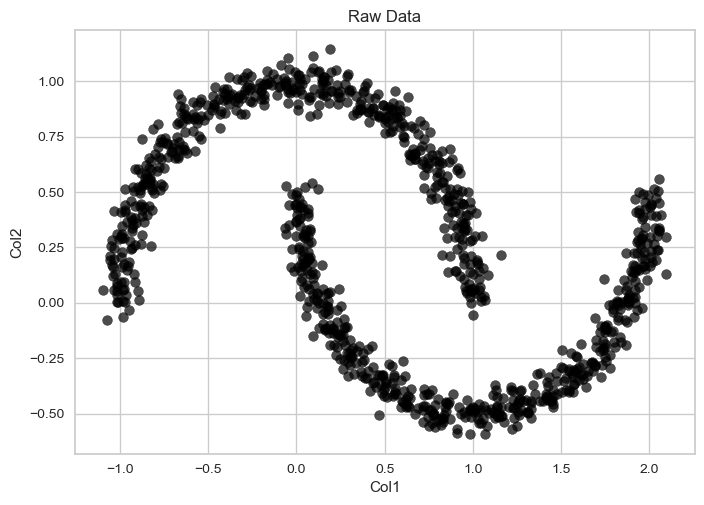

In [5]:
fig, ax = plt.subplots()

# Graph features
ax.scatter(
    X["Col1"], X["Col2"], marker="o", alpha=0.7, s=50, color="black", edgecolor="black"
)

# Label the Axes.
ax.set_title("Raw Data")
ax.set_xlabel(X.columns[0])
ax.set_ylabel(X.columns[1])

- The structure of the data is represented in the form of two mirrored crescent moons.